In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
data.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [7]:
data=data.drop(['MiscFeature'],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
import seaborn as sns

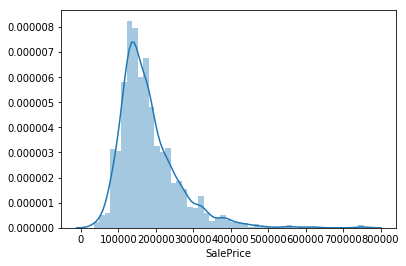

In [11]:

sns.distplot(data['SalePrice'])

In [12]:

data['SalePrice'].skew()

1.8828757597682129

In [13]:
data['SalePrice'].kurt()

6.536281860064529

In [14]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

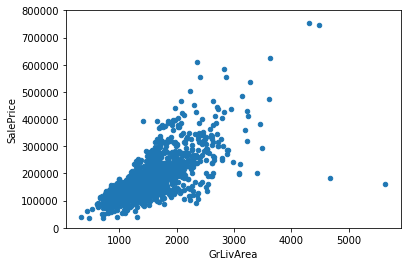

In [15]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data_df = pd.concat([data['SalePrice'], data[var]], axis=1)
data_df.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

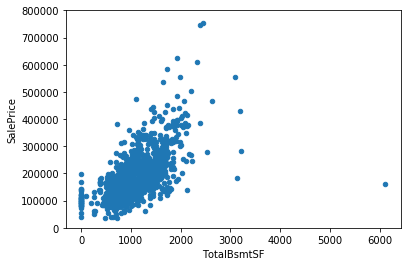

In [16]:
var='TotalBsmtSF'
data_df=pd.concat([data['SalePrice'],data[var]],axis=1)
data_df.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

In [17]:



import matplotlib.pyplot as plt

(-0.5, 9.5, 0, 800000)

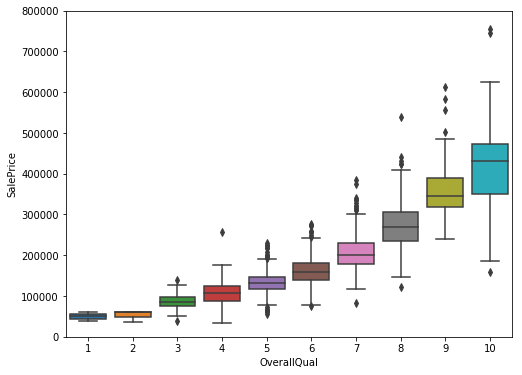

In [18]:
var='OverallQual'
data_df=pd.concat([data['SalePrice'],data[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice',data=data_df)
fig.axis(ymin=0,ymax=800000)

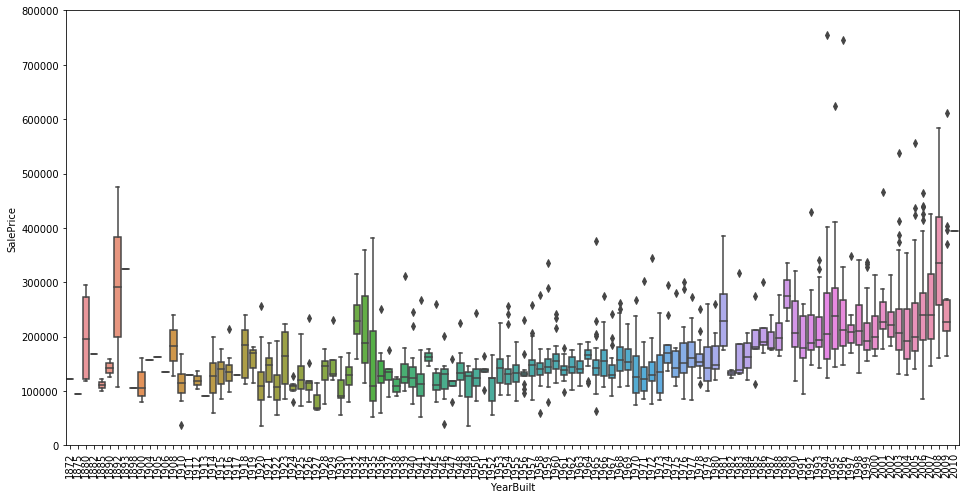

In [19]:
var = 'YearBuilt'
data_df = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data_df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


we can conclude that:

'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

In [20]:
corrmat=data.corr()

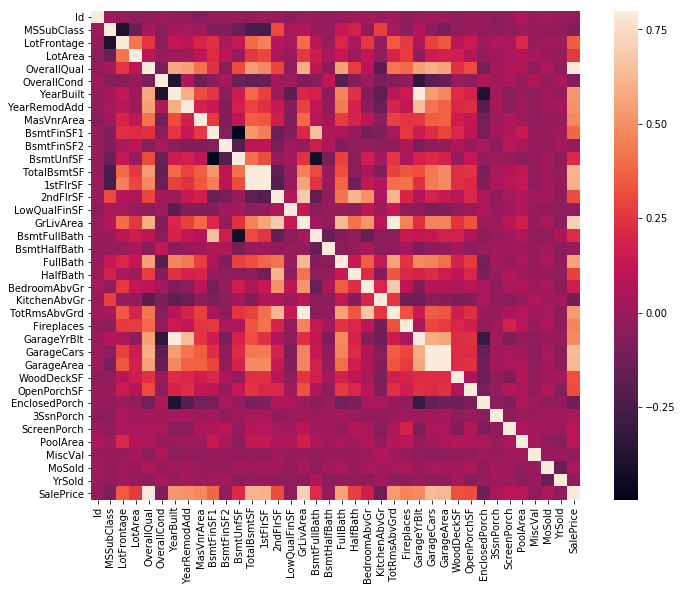

In [21]:
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.



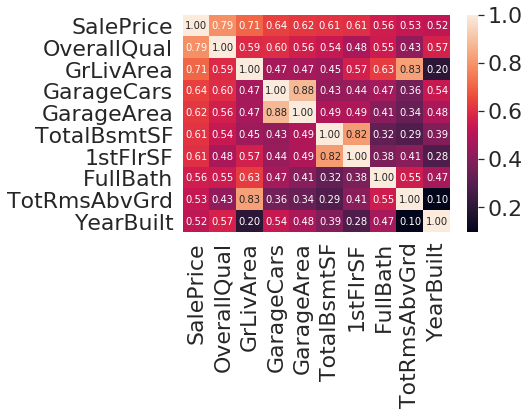

In [22]:

import numpy as np
k=10
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(data[cols].values.T)
sns.set(font_scale=2.0)
hm=sns.heatmap(cm,cbar=True,annot=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
'FullBath'?? Really?
'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.

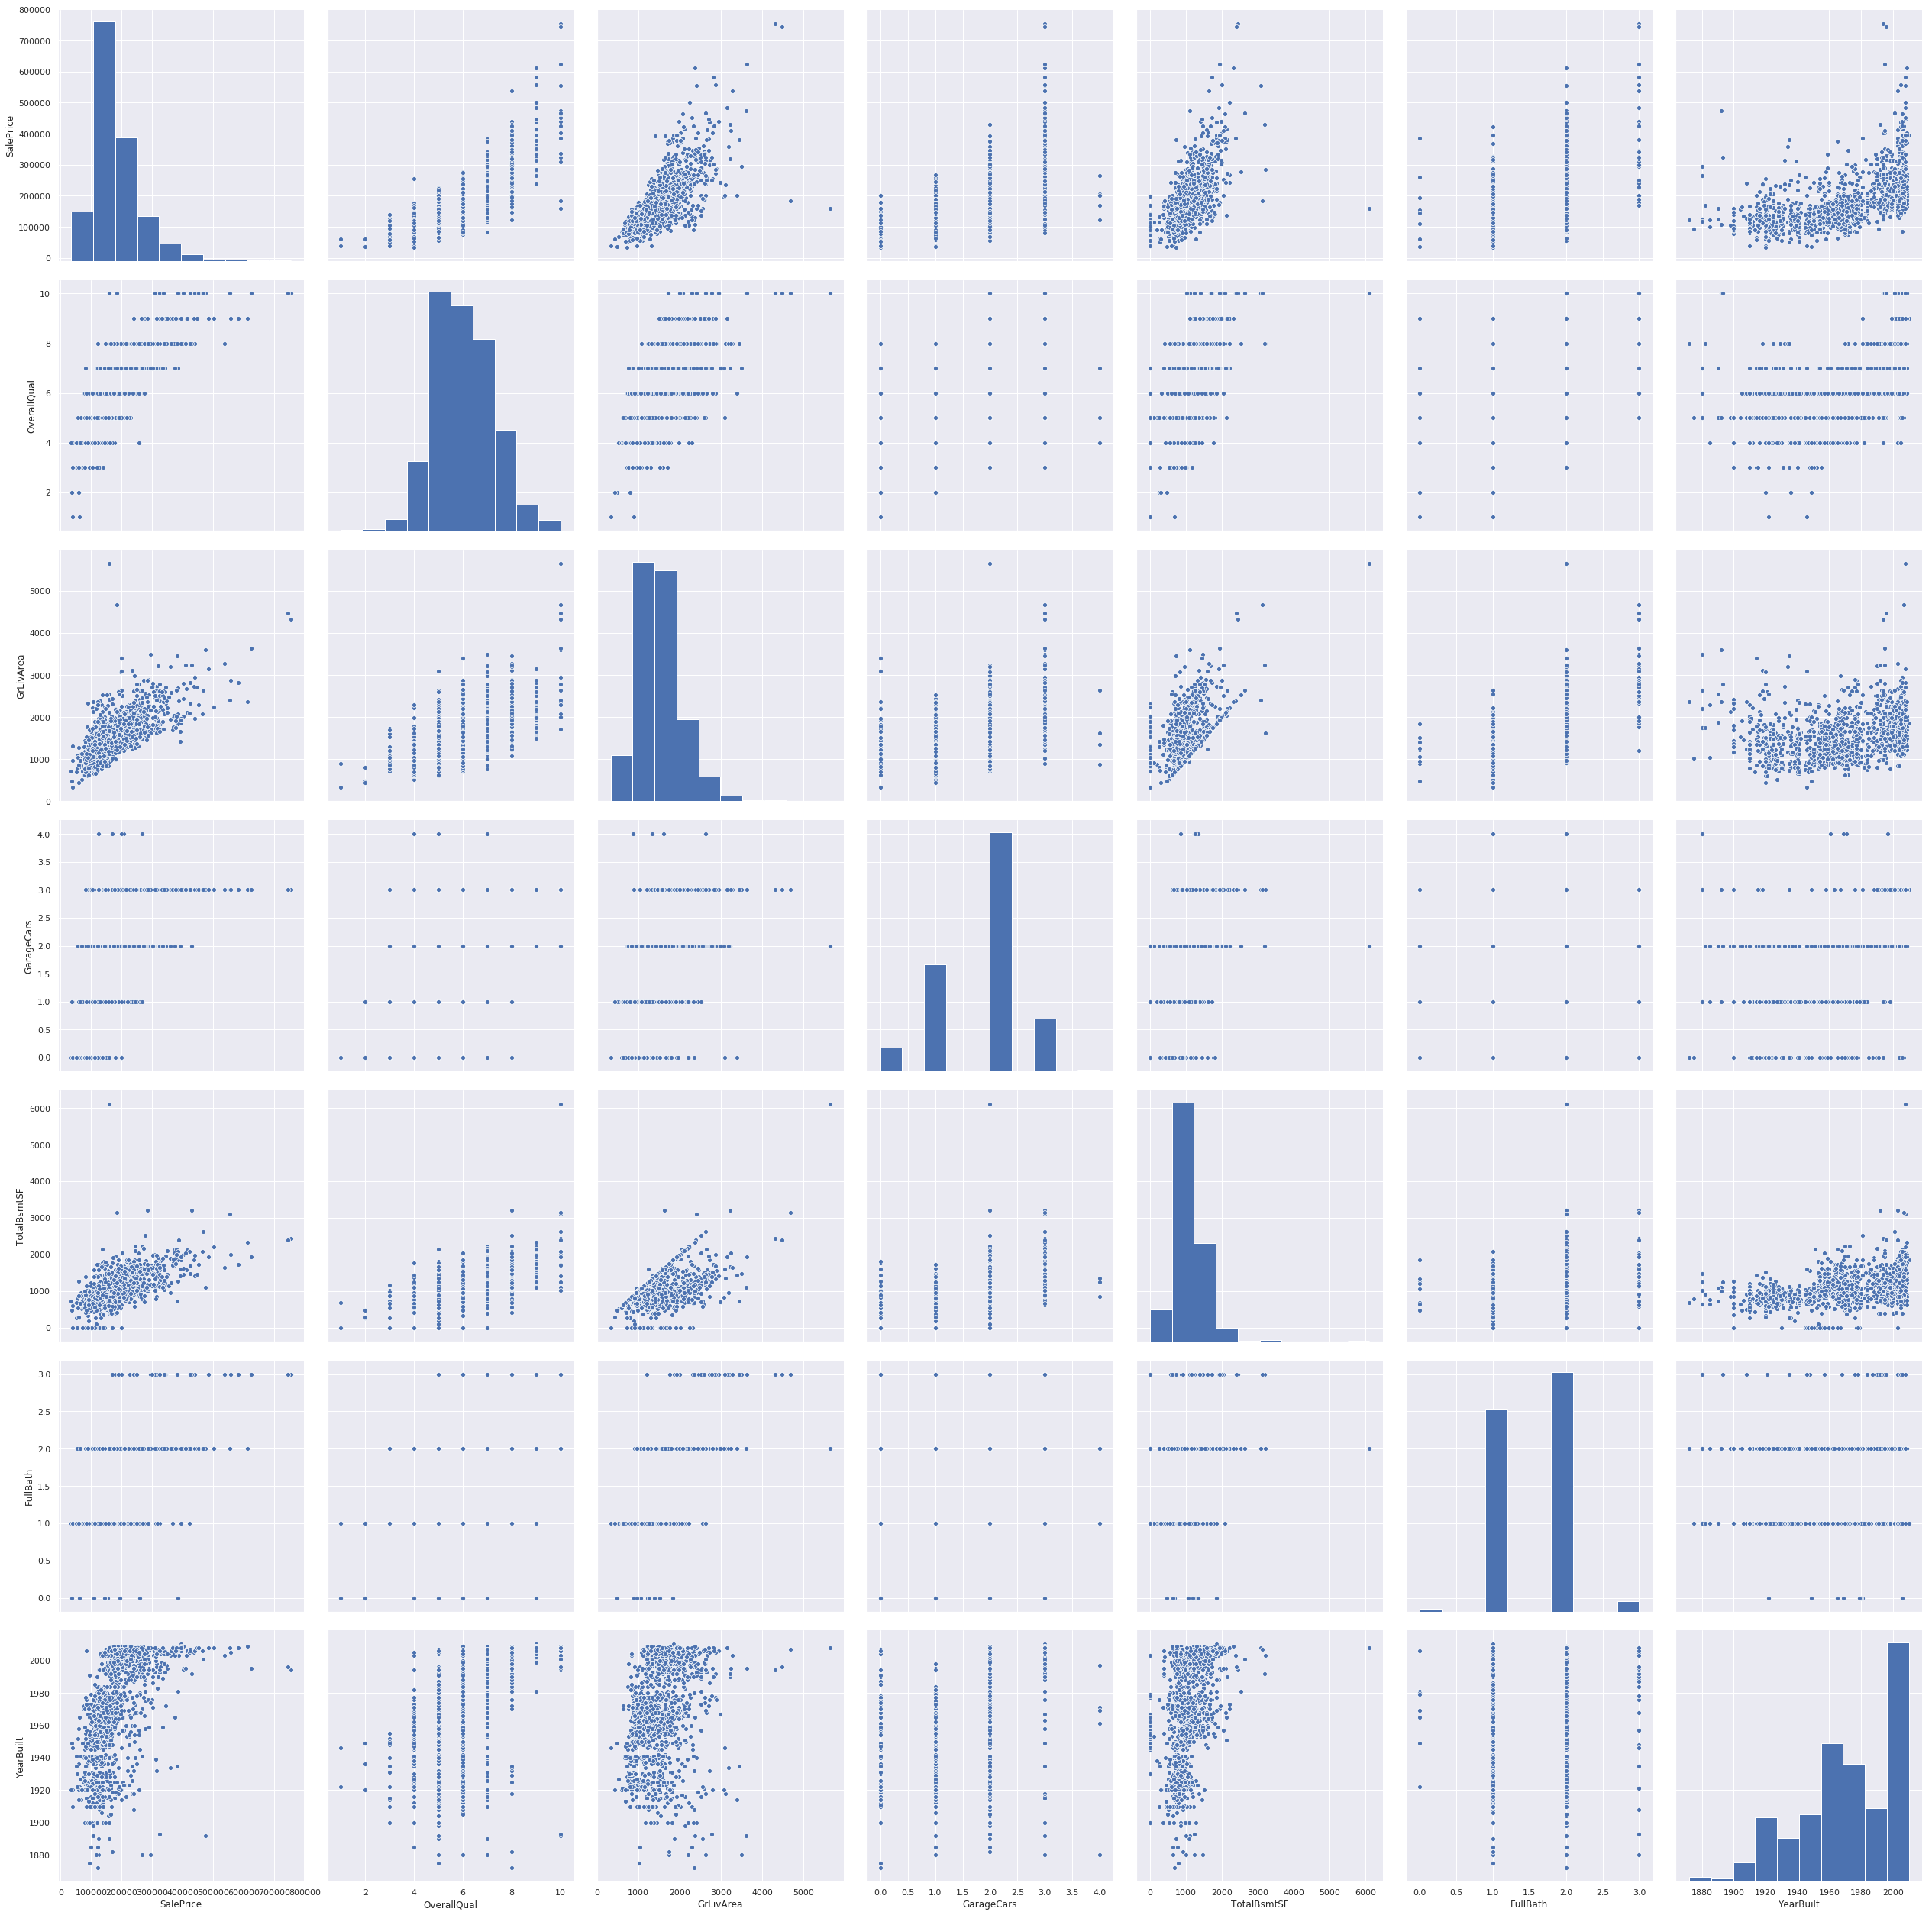

In [23]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols],height=5)
plt.show()

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

In [24]:
total=data.isnull().sum().sort_values(ascending=False)
percent=((data.isnull().sum()/len(data))*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','percent'])
missing_data.head()

,Total,percent
PoolQC,1453,99.520548
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726


In [25]:
missing_data.head(20)

,Total,percent
PoolQC,1453,99.520548
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


Imputing missing values



We impute them by proceeding sequentially through features with missing values

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.


In [26]:
data['PoolQC']=data['PoolQC'].fillna('None')

Alley : data description says NA means "no Alley"

In [27]:
data['Alley']=data['Alley'].fillna('None')

In [28]:
data['Fence']=data['Fence'].fillna('None')

In [29]:
data['FireplaceQu']=data['FireplaceQu'].fillna('None')

In [30]:
data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [31]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col]=data[col].fillna('None')

In [32]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col]=data[col].fillna(0)

In [33]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col]=data[col].fillna(0)

In [34]:
data['MasVnrtype']=data['MasVnrType'].fillna('None')

In [35]:
data['MasVnrArea']=data['MasVnrArea'].fillna(0)

In [36]:
data.shape

(1460, 81)

In [37]:
data.drop('Id',axis=1,inplace=True)

In [38]:
data.shape
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

In [39]:
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [40]:
data=data.drop(['Utilities'],axis=1)

In [41]:
data.shape

(1460, 79)

In [42]:
data['Functional']=data['Functional'].fillna('typ')

In [43]:
data['Electrical']=data['Electrical'].fillna(data['Electrical'].mode()[0])

In [44]:
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

In [45]:
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])

In [46]:
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [47]:
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])

In [48]:
data['MSSubClass']=data['MSSubClass'].fillna('None')

In [49]:
data_na=data.isnull().sum()
missing_ratio=(data_na/len(data)*100)
missing_ratio=missing_ratio.drop(missing_ratio[missing_ratio==0].index)
missing_data=pd.DataFrame(missing_ratio)
missing_data



,0
MasVnrType,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740


In [50]:
data['MasVnrType'].isnull().count()
data['BsmtQual'].isnull().count()
data['BsmtExposure'].isnull().count()
data['BsmtFinType1'].isnull().count()
data['BsmtFinType2'].isnull().count()

1460

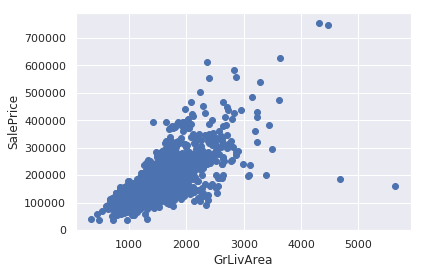

In [51]:
fig,ax=plt.subplots()
ax.scatter(x=data['GrLivArea'],y=data['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.[](http://)

In [52]:
data=data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [53]:
from scipy import stats
from scipy.stats import norm, skew 

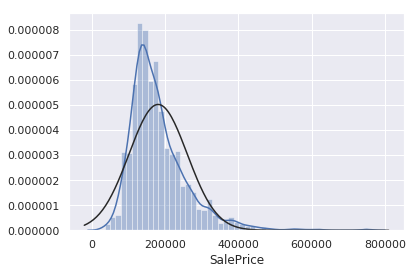

In [54]:
sns.distplot(data['SalePrice'],fit=norm)
mu,sigma=norm.fit(data['SalePrice'])

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

(12.024015155682552, 0.3995757283645756)

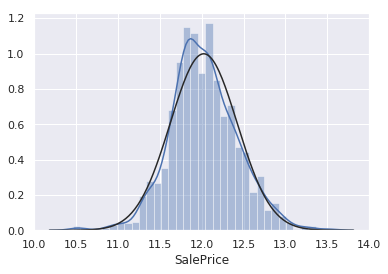

In [55]:


data['SalePrice']=np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'],fit=norm)
mu,sigma=norm.fit(data['SalePrice'])
mu,sigma

In [56]:


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1458 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1450 no

In [57]:
data['MSSubClass']=data['MSSubClass'].apply(str)
data['OverallCond']=data['OverallCond'].astype(str)
data['YrSold']=data['YrSold'].astype(str)
data['MoSold']=data['MoSold'].astype(str)

Now using Label encoder for categorical features

In [58]:
from sklearn.preprocessing import LabelEncoder
cols=[ 
        'ExterQual', 'ExterCond','HeatingQC',  'KitchenQual',  
         'Functional',   'LandSlope',
        'LotShape', 'PavedDrive', 'Street',  'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']
for c in cols:
    lbl=LabelEncoder()
    lbl.fit(data[c].values)
    data[c]=lbl.transform(data[c].values)
    
    

In [59]:
data.shape

(1458, 79)

In [60]:
numeric_feat=data.dtypes[data.dtypes != 'object'].index

In [61]:
skewed_feats=data[numeric_feat].apply(lambda x: skew(x.dropna()))

In [62]:
skewness=pd.DataFrame(skewed_feats)

In [63]:
abs(skewness)

,0
MSSubClass,0.261945
LotFrontage,1.546174
LotArea,12.560986
Street,15.492067
LotShape,0.611279
LandSlope,4.805032
OverallQual,0.200579
OverallCond,0.690324
YearBuilt,0.611665
YearRemodAdd,0.501322


In [64]:
skewness=skewness[abs(skewness)>0.75]

In [65]:
skewness

,0
MSSubClass,NaN
LotFrontage,1.546174
LotArea,12.560986
Street,-15.492067
LotShape,NaN
LandSlope,4.805032
OverallQual,NaN
OverallCond,NaN
YearBuilt,NaN
YearRemodAdd,NaN


In [66]:
skewed_features=skewness.index

In [67]:
skewed_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [68]:
from scipy.special import boxcox1p
data['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1458, dtype: int64

In [69]:
lam=0.15

In [70]:
for feat in skewed_features:
    data[feat]=boxcox1p(data[feat],lam)

In [71]:
data=pd.get_dummies(data)

In [72]:
data.shape

(1458, 265)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
sale_price=data['SalePrice']

In [75]:
data.drop('SalePrice',axis=1)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrtype_BrkCmn,MasVnrtype_BrkFace,MasVnrtype_None,MasVnrtype_Stone
0,2.750250,5.831328,19.212182,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,14.187527,...,0,0,0,0,1,0,0,1,0,0
1,1.820334,6.221214,19.712205,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,14.145138,...,0,0,0,0,1,0,0,0,1,0
2,2.750250,5.914940,20.347241,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,14.185966,...,0,0,0,0,1,0,0,1,0,0
3,2.885846,5.684507,19.691553,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,14.135652,...,1,0,0,0,0,0,0,0,1,0
4,2.750250,6.314735,21.325160,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,14.182841,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2.750250,5.744420,18.960528,0.730463,1.540963,0.0,2.259674,1.820334,14.181278,14.182841,...,0,0,0,0,1,0,0,0,1,0
1456,1.820334,6.337529,20.994868,0.730463,1.540963,0.0,2.259674,2.055642,14.148295,14.164038,...,0,0,0,0,1,0,0,0,0,1
1457,2.885846,5.859551,19.476345,0.730463,1.540963,0.0,2.440268,2.602594,14.089451,14.192207,...,0,0,0,0,1,0,0,0,1,0
1458,1.820334,5.914940,19.760176,0.730463,1.540963,0.0,2.055642,2.055642,14.103852,14.176584,...,0,0,0,0,1,0,0,0,1,0


In [76]:
data_train,data_test,sale_price_train,sale_price_test=train_test_split(data,sale_price,test_size=0.2)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr=LinearRegression()

In [79]:
lr.fit(data_train,sale_price_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
pred=lr.predict(data_test)

In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
mean_squared_error(sale_price_test,pred)

1.9006581405514365e-13

In [83]:
from sklearn.linear_model import Lasso

In [84]:
la=Lasso()

In [85]:
la.fit(data_train,sale_price_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
pred=la.predict(data_test)

In [87]:
mean_squared_error(sale_price_test,pred)

0.001847589147860662

In [88]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [89]:
rfr=RandomForestRegressor()

In [90]:
rfr.fit(data_train,sale_price_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [91]:
pred=rfr.predict(data_test)

In [92]:
mean_squared_error(sale_price_test,pred)

1.3157125874814747e-06

In [93]:
gbr=GradientBoostingRegressor()

In [94]:
gbr.fit(data_train,sale_price_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
pred=gbr.predict(data_test)

In [96]:
mean_squared_error(pred,sale_price_test)

3.212423890586331e-07

In [97]:
from sklearn.model_selection import cross_val_score,KFold
#validationfunction
folds=5
def rmse_cv(model):
    kf=KFold(folds,shuffle=True,random_state=42).get_n_splits(data_train.values)
    rmse=np.sqrt(-cross_val_score(model,data_train.values,sale_price_train,scoring='neg_mean_squared_error',cv=kf))
    return rmse

In [98]:
gbr=GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=4,random_state=4)

In [99]:
gbr.fit(data_train,sale_price_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto', random_state=4,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [100]:
pred=gbr.predict(data_test)

In [101]:
mean_squared_error(sale_price_test,pred)

2.858619716059419e-07

In [102]:
score=rmse_cv(gbr)

In [103]:
score.mean()

0.0010824784867096969

In [104]:
import xgboost as xgb

In [105]:
model_xgb=xgb.XGBRegressor(n_estimators=2200,max_depth=3)

d

In [106]:
score=rmse_cv(model_xgb)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:50:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:50:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:51:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:51:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


score=rmse_cv(model_xgb)

In [107]:
score.mean()

0.0015593438770238333

In [108]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


In [109]:
Enet=make_pipeline(RobustScaler(),ElasticNet())

In [110]:
score=rmse_cv(Enet)

In [111]:
score.mean()

0.0442212283593084

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,models):
        self.models=models
    
    def fit(self,X,y):
        self.models_=[clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        predictions=np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions,axis=1)

In [113]:
avg_models=AveragingModels(models=(la,Enet,gbr,model_xgb))

In [114]:
score = rmse_cv(avg_models)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:51:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:52:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [115]:
score.mean()

0.022556495508751558